## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

# HW2 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2023
#### Due : 3/29 (WED)  11:59 PM 

## Fetching coronavirus-19(COVID-19) pandemic data from Wikipedia

In this example we will fetch data about countries and their COVID-19 from Wikipedia.

https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic has several tables for individual countries, subcontinents as well as timelines. 


###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### The html code normally looks like this (you can even manually inspect it with Chrome, Firefox etc)

> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>Some website name</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

with lots of divs as well... 

##### HINT: Use requests library to fetch the html source



In [2]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'

##################################################################################

# YOUR CODE HERE #

req = requests.get(url)
print(req)

##################################################################################

<Response [200]>


## 1. Parsing html data

With the html code, we are going to extract the following tables named, 
* #### COVID-19 cases, deaths, and rates by locations (*from the "Total cases, deaths, and death rates by country" section*)

After you parsed the html code and retrieve the above four tables,  **print the html source code**


> *`<table ... id="thetable">`*<br/>
> *`<tr>`*<br/>
> *`<th>#</th>`*<br/>
> *`<th>Countries and territories</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

##### HINT: First, study the html source and find code blocks related to tabular data. 
##### HINT: Then, use BeautifulSoup to "scrap the tabular data of html by "tracking" elements with class/id attributes

In [3]:
"""Step 1. Study the HTML Source"""

##################################################################################

# YOUR CODE HERE #
html_source = req.text
print(html_source)


##################################################################################


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabl

In [4]:
"""Step 2. Retrieve all the tables using BeautifulSoup()"""

##################################################################################

# YOUR CODE HERE #

# COVID-19 cases, deaths, and rates by locations

soup = BeautifulSoup(html_source, 'html.parser')
tables = soup.find_all('table', attrs={'class':'wikitable'})
print(tables)

##################################################################################



[<table class="wikitable">
<tbody><tr>
<td style="max-width:300px">Map of <b>total confirmed cases</b> by country<sup class="reference" id="cite_ref-total-cases_11-0"><a href="#cite_note-total-cases-11">[9]</a></sup><sup class="reference" id="cite_ref-CSSE_10-1"><a href="#cite_note-CSSE-10">[note 2]</a></sup><sup class="reference" id="cite_ref-OWID-notes_12-0"><a href="#cite_note-OWID-notes-12">[note 3]</a></sup>
</td></tr>
<tr>
<td style="background-color:white;"><div class="floatnone"><a class="image" href="/wiki/File:COVID-19_Outbreak_World_Map.svg"><img alt="COVID-19 Outbreak World Map.svg" data-file-height="1500" data-file-width="2921" decoding="async" height="154" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/COVID-19_Outbreak_World_Map.svg/300px-COVID-19_Outbreak_World_Map.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/COVID-19_Outbreak_World_Map.svg/450px-COVID-19_Outbreak_World_Map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/

In [6]:
"""Step 3. Get the table we need for this assignment and print its html source"""
"""Table 1. COVID-19 cases, deaths, and rates by locations"""
##################################################################################

# YOUR CODE HERE #
table = tables[11]
print(table)


##################################################################################

<table class="wikitable sortable sortunder tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
<caption><a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> cases, deaths, and rates by <a class="mw-selflink selflink">location</a><sup class="reference" id="cite_ref-Template:COVID-19_datab_26-0"><a href="#cite_note-Template:COVID-19_datab-26">[21]</a></sup>
</caption>
<tbody><tr class="sticky-row">
<th class="unsortable" style="padding-bottom: 1em;">
</th>
<th scope="col" style="padding-bottom: 1em;">Country
</th>
<th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
</th>
<th scope="col" style="padding-bottom: 1em;">Deaths
</th>
<th scope="col" style="padding-bottom: 1em;">Cases
</th></tr>
<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikime

## 2. Extracting data and filling it into a dictionary(Python data stucture)

#### Extract COVID-19 data for countries from table and store it in dictionary.
*Please print parsed dictionary at the end of code*

##### Shape of Dictionary
- { 'country_name': {'Deaths / million': num, 'Deaths': num, 'Cases': num}}
- *Dictionary data structure does not have order between Keys, so it may show up in different order(index).  You don't need to be worried of it*
- e.g. 'Uzbekistan': {'cases': '2,017', 'deaths': '9', 'recovers': '1,096'}, 'Puerto Rico': {'Deaths / million': '6446', 'Deaths': '219493', 'Cases': '4486832'} ...

In [7]:
"""Hint 1. Examine the actual table posted in the Wikipedia page and identify the columns."""
"""Hint 2. These columns will be necessary for converting the html-based data to dictionary format."""
"""Hint 3. Beautiful soup will help you get all you need."""


"""Table 1. COVID-19 cases, deaths, and rates by locations"""
output_dict = dict()
##################################################################################

# YOUR CODE HERE #

# print(output_dict) should look like the below cell!

rows = table.find_all('tr')
# print(rows)
del rows[0:2] # table의 가장 위 + world 자료
del rows[-1] # table의 가장 마지막 설명 부분

for row in rows:
    col_values = []

    for col in row.find_all('td'):
        num = col.get_text().replace(',','').strip("\n")
        if num != '':
            col_values.append(num)
        else:
            continue
    
    country_dict = dict()
    country_dict['Deaths / million'] = col_values[0]
    country_dict['Deaths'] = col_values[1]
    country_dict['Cases'] = col_values[2]

    country_name = row.find('th').get_text().strip("\n")

    output_dict[country_name] = country_dict

##################################################################################


In [8]:
"""
    {
        'Peru': {'Deaths / million': '6365', 'Deaths': '212354', 'Cases': '3548717'},
        'Bulgaria': ...,
        ...
        'Marshall Island': ...
    }   
"""
output_dict

{'Peru': {'Deaths / million': '6450', 'Deaths': '219648', 'Cases': '4489377'},
 'Bulgaria': {'Deaths / million': '5638',
  'Deaths': '38240',
  'Cases': '1298608'},
 'Bosnia and Herzegovina': {'Deaths / million': '5039',
  'Deaths': '16296',
  'Cases': '401973'},
 'Hungary': {'Deaths / million': '4884',
  'Deaths': '48690',
  'Cases': '2197820'},
 'North Macedonia': {'Deaths / million': '4616',
  'Deaths': '9665',
  'Cases': '347327'},
 'Georgia': {'Deaths / million': '4541',
  'Deaths': '17004',
  'Cases': '1831771'},
 'Montenegro': {'Deaths / million': '4477',
  'Deaths': '2808',
  'Cases': '289292'},
 'Croatia': {'Deaths / million': '4472',
  'Deaths': '18025',
  'Cases': '1270075'},
 'Slovenia': {'Deaths / million': '4331',
  'Deaths': '9183',
  'Cases': '1336426'},
 'Czech Republic': {'Deaths / million': '4057',
  'Deaths': '42576',
  'Cases': '4627435'},
 'Slovakia': {'Deaths / million': '3733',
  'Deaths': '21069',
  'Cases': '1864741'},
 'Moldova': {'Deaths / million': '3674', 

## 3. Creating a dataframe(Python data structure) from a dictionary

With the dictionary, we are going to convert it into dataframe

##### HINT: There is a really nice pandas function that directly builds the dataframe using your dictionary 


* Shape of dataframe must be like following table.
* i.e. indices: country_name, columns: cases, deaths, recovers
<table>
  <tr>
    <th></th>
    <th>Deaths / million</th>
    <th>Deaths</th>
    <th>Cases</th>
  </tr>
  <tr>
    <td>Hungary</td>
    <td>4881</td>
    <td>48651</td>
    <td>2195926</td>
  </tr>
  <tr>
    <td>North Macedonia</td>
    <td>4615</td>
    <td>9662</td>
    <td>346852</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
</table>



In [9]:
"""Dictionary -> DataFrame"""

##################################################################################

# YOUR CODE HERE #
df = pd.DataFrame(output_dict).T
##################################################################################


In [10]:
df

,Deaths / million,Deaths,Cases
Peru,6450,219648,4489377
Bulgaria,5638,38240,1298608
Bosnia and Herzegovina,5039,16296,401973
Hungary,4884,48690,2197820
North Macedonia,4616,9665,347327
...,...,...,...
Tuvalu,—,—,2779
Tokelau,—,0,5
Turkmenistan,—,0,0
Vatican City,—,0,26


## 4-1. Adding some data(death rates) from the original dataframe

* Calculate death rates by 'deaths/cases'
* Add the death rates column to original data frame named 'death_rates'
* Decimal place of death rates is two. i.e. 0.26




<table>
  <tr>
    <th></th>
    <th>Deaths / million</th>
    <th>Deaths</th>
    <th>Cases</th>
    <th>death_rates</th>
  </tr>
  <tr>
    <td>Hungary</td>
    <td>4881</td>
    <td>48651</td>
    <td>2195926</td>
    <td>0.02</td>
  </tr>
  <tr>
    <td>North Macedonia</td>
    <td>4615</td>
    <td>9662</td>
    <td>346852</td>
    <td>0.03</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
</table>

In [11]:
"""Step 1. Check each column's data type in the merged dataframe"""
##################################################################################

# YOUR CODE HERE #

df.dtypes

##################################################################################

Deaths / million    object
Deaths              object
Cases               object
dtype: object

In [12]:
"""Step 2. Find and Replace the non-numeric values with NaN. Then re-check the data types of each column. All of them should be float-based (float64) or int-based (int64)"""
##################################################################################

# YOUR CODE HERE #

df = df.replace('—', np.NaN)
df['Deaths / million'] = pd.to_numeric(df['Deaths / million'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Cases'] = pd.to_numeric(df['Cases'])
df.dtypes

##################################################################################

Deaths / million    float64
Deaths              float64
Cases                 int64
dtype: object

In [13]:
"""Step 3. Drop the rows that contain at least one "nan". The shape of the updated dataframe should be (230, 3)"""

##################################################################################

# YOUR CODE HERE #

df = df.dropna(axis = 0)
print(df.isna().sum().sum())
df

##################################################################################

0


,Deaths / million,Deaths,Cases
Peru,6450.0,219648.0,4489377
Bulgaria,5638.0,38240.0,1298608
Bosnia and Herzegovina,5039.0,16296.0,401973
Hungary,4884.0,48690.0,2197820
North Macedonia,4616.0,9665.0,347327
...,...,...,...
Benin,12.0,163.0,27999
Niger,12.0,315.0,9513
Chad,10.0,194.0,7682
Burundi,1.0,15.0,53661


In [14]:
"""Step 4. Add a new column 'death_rates' and fill the column with appropriate values"""
##################################################################################

# YOUR CODE HERE #
df['death_rates'] = df['Deaths'] / df['Cases']
df

##################################################################################

,Deaths / million,Deaths,Cases,death_rates
Peru,6450.0,219648.0,4489377,0.048926
Bulgaria,5638.0,38240.0,1298608,0.029447
Bosnia and Herzegovina,5039.0,16296.0,401973,0.040540
Hungary,4884.0,48690.0,2197820,0.022154
North Macedonia,4616.0,9665.0,347327,0.027827
...,...,...,...,...
Benin,12.0,163.0,27999,0.005822
Niger,12.0,315.0,9513,0.033113
Chad,10.0,194.0,7682,0.025254
Burundi,1.0,15.0,53661,0.000280


## 5-1. Print top 5 countries with the highest/lowest death rates by COVID-19. (total 10 countries)

In [17]:
###YOUR CODE HERE###
# highest 5
print(df.sort_values(by = 'death_rates', ascending = False).head(5))

# lowest 5
print(df.sort_values(by = 'death_rates', ascending = False).tail(5))

             Deaths / million  Deaths  Cases  death_rates
North Korea               0.0     6.0      1     6.000000
Yemen                    64.0  2159.0  11945     0.180745
Sudan                   107.0  5026.0  63899     0.078655
Syria                   142.0  3163.0  57423     0.055082
Somalia                  77.0  1361.0  27334     0.049791
              Deaths / million  Deaths   Cases  death_rates
Brunei                   334.0   150.0  280790     0.000534
Bhutan                    26.0    21.0   62647     0.000335
Cook Islands             117.0     2.0    7033     0.000284
Burundi                    1.0    15.0   53661     0.000280
Nauru                     78.0     1.0    5393     0.000185


## 5-2. Create a sub-dataframe for the five countries extracted in question 5-1(highest case).

<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">Deaths / million</th>
    <th class="tg-yw4l">Deaths</th>
    <th class="tg-baqh">Cases</th>
    <th class="tg-yw4l">death_rates</th>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name1   </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">              </td>
    <td class="tg-yw4l">                    </td>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name2</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-baqh">...</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name5</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
</table>

In [20]:
###YOUR CODE HERE###
subdf = df.sort_values(by = 'death_rates', ascending = False).head(5)
subdf

,Deaths / million,Deaths,Cases,death_rates
North Korea,0.0,6.0,1,6.000000
Yemen,64.0,2159.0,11945,0.180745
Sudan,107.0,5026.0,63899,0.078655
Syria,142.0,3163.0,57423,0.055082
Somalia,77.0,1361.0,27334,0.049791


## 5-3. Perform sanity checks on the values of the added column('death_rates'). Do you observe any anomalous value? Delete row(s) containing anomalous value.

In [22]:
## print out the index value of invalid row(s)
###YOUR CODE HERE###

subdf[subdf['death_rates']>1].index


Index(['North Korea'], dtype='object')

In [23]:
## Drop the invalid row

###YOUR CODE HERE###
subdf = subdf.drop(labels = 'North Korea', axis = 0)
subdf

,Deaths / million,Deaths,Cases,death_rates
Yemen,64.0,2159.0,11945,0.180745
Sudan,107.0,5026.0,63899,0.078655
Syria,142.0,3163.0,57423,0.055082
Somalia,77.0,1361.0,27334,0.049791


## 5-4. Plot death rates from the dataframe 'subdf'

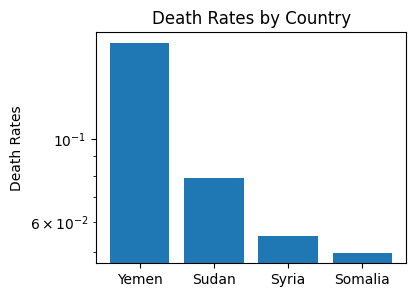

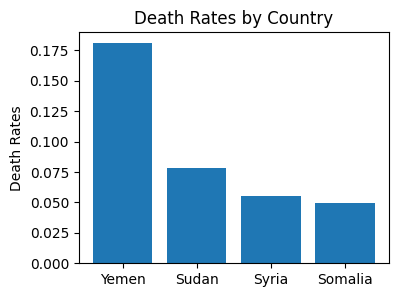

In [30]:
###YOUR CODE HERE###
# Use the following code(you can use log scale for better visualize)

#log scale로 시각화
fig1 = plt.figure(figsize=(4,3))
x = subdf.index.to_list()
y = subdf['death_rates'].to_list()

plt.title('Death Rates by Country')
plt.ylabel('Death Rates')
plt.bar(x, y)
plt.yscale('log', base = 10)
plt.show()

# 일반 scale 시각화
fig2 = plt.figure(figsize=(4,3))
x = subdf.index.to_list()
y = subdf['death_rates'].to_list()

plt.title('Death Rates by Country')
plt.ylabel('Death Rates')
plt.bar(x, y)
plt.show()